In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.filters import threshold_otsu


<class 'tuple'>


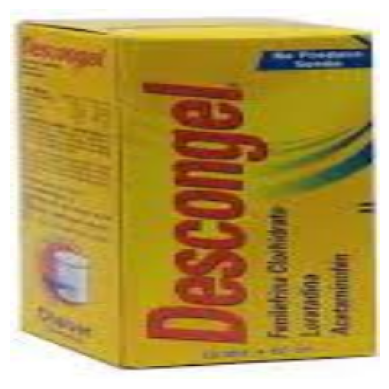

In [48]:

sample_image = cv2.imread('../dataset/01_Descongel/00001_descongelACE.JPEG')
img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
print(type(img.shape))

img = cv2.resize(img,(256,256))

plt.axis('off');
plt.imshow(img)




In [59]:
import pandas as pd
data2 = pd.read_csv('/Users/chocoplot/Documents/codeLAB/signal_Recognition/medicamentos2.csv', header=None)
datax=data2.to_numpy().tolist()

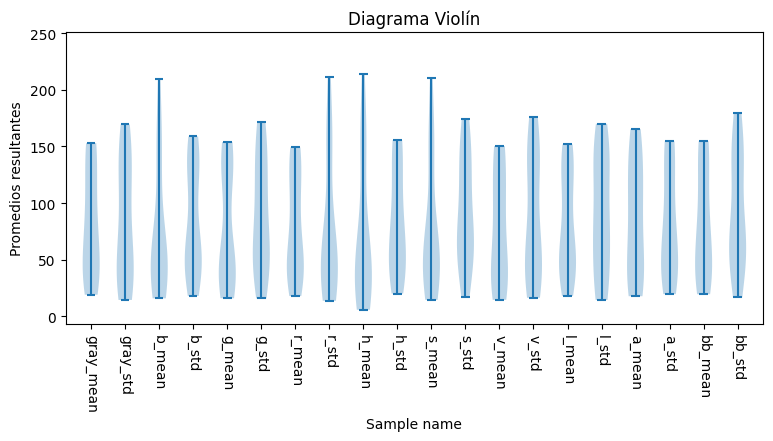

In [75]:
import matplotlib.pyplot as plt
import numpy as np


def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels, rotation=-90)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')


# create test data
# np.random.seed(19680801)
# data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]
data2 = pd.read_csv('/Users/chocoplot/Documents/inputSC2.csv', header=None)
data=data2.to_numpy().tolist()

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), sharey=True)

ax1.set_title('Diagrama Violín')
ax1.set_ylabel('Promedios resultantes')
ax1.violinplot(data)

# ax2.set_title('Customized violin plot')
# parts = ax2.violinplot(
#         data, showmeans=False, showmedians=False,
#         showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
# ax2.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
# ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
# ax2.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# set style for the axes
labels = ['gray_mean',	'gray_std',	'b_mean',	'b_std'	,'g_mean',	'g_std',	'r_mean',	'r_std',	'h_mean',	'h_std',	's_mean',	's_std',	'v_mean',	'v_std',	'l_mean',	'l_std',	'a_mean',	'a_std',	'bb_mean',	'bb_std']
for ax in [ax1, ax2]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
# plt.xticks(ax1, labels, rotation=-90)
plt.show()